In [1]:
import os 
os.chdir("../../..")
from MSML.src.math_spec_mapping import (load_from_json, create_action_chains_graph, write_out_boundary_actions,
                      write_out_policies, write_out_mechanisms, load_svg_graphviz, write_basic_report_full,
                      write_action_chain_reports, write_spec_tree, create_parameter_impact_table,
                     write_entity_reports, write_wiring_report, write_entity_markdown_report,
                     write_all_markdown_reports)
os.chdir("Quai-Macro-Model/Spec")

from IPython.display import display, display_html
from copy import deepcopy
from src import math_spec_json
import numpy as np
from pprint import pprint
from simulation import state_base, params_base, vesting_schedule_translate

ms = load_from_json(deepcopy(math_spec_json))

msi = ms.build_implementation(params_base)

Placeholder has no control action options


## Source Code for All Used Components

In [2]:
keys = [x.name for x in ms.wiring['Price Movements Wiring'].components_full()]
msi.print_source_code_files(keys)

--------------------Price Movements Boundary Action--------------------
def hashpower_price_movement(state, params, spaces):
    ewm_lambda = params["Price EWMA Lambda"]
    c = state["Metrics"]["Conversion Rate Metric"](state, params, [])
    p_quai = state["Quai Price"]
    p_qi = state["Qi Price"]
    hashpower_cost = params["Hashpower Cost Series"][state["Block Number"]]
    qi_sigma = params["Qi Price Movemement Sigma"]
    quai_sigma = params["Quai Price Movemement Sigma"]

    p_qi_new = (
        ewm_lambda * hashpower_cost
        + (1 - ewm_lambda) * p_qi
        + np.random.normal(0, qi_sigma) * p_qi
    )

    p_quai_new = (
        ewm_lambda * c * p_qi
        + (1 - ewm_lambda) * p_quai
        + np.random.normal(0, quai_sigma) * p_quai
    )

    space = {
        "Qi Return": max(p_qi_new / p_qi - 1, -0.99),
        "Quai Return": max(p_quai_new / p_quai - 1, -0.99),
    }
    return [space]





--------------------Price Movements Policy--------------------
def price_

In [3]:
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate], parameter_preperation_functions=[])
spaces = msi.boundary_actions['Price Movements Boundary Action'](state, params, [])
pprint(spaces)
print()
print()
print()
spaces = msi.policies['Price Movements Policy'](state, params, spaces)
pprint(spaces)
print()
print()
print()
spaces = msi.mechanisms['Update Prices Mechanism'](state, params, spaces)
pprint(state)

[{'Qi Return': -0.04765642625170574, 'Quai Return': -0.04253436804928712}]



[{'Qi Price': 0.9523435737482943, 'Quai Price': 0.9574656319507129}]



{'Block Difficulty': 1000000000,
 'Block Number': 0,
 'Delta Time': 0,
 'Dummy': None,
 'Estimated Mining Beta Vector': [None, None],
 'Historical Converted Qi': [],
 'Historical Converted Quai': [],
 'Historical Mined Ratio': [],
 'Historical Qi Hash': [],
 'Historical Quai Hash': [],
 'K Qi': 1,
 'K Quai': 1,
 'Locked Qi Supply': 0,
 'Locked Quai Supply': 3950000000.0000014,
 'Logistic Classifier': None,
 'Metrics': {'Conversion Rate Metric': <function conversion_rate_metric at 0x7facd8c2a4c0>,
             'Current Block Reward Ratio Metric': <function current_block_reward_ratio_metric at 0x7facd8c2a550>,
             'Hash to Qi Metric': <function hash_to_qi_metric at 0x7facd8c2a3a0>,
             'Hash to Quai Metric': <function hash_to_quai_metric at 0x7facd8c2a430>,
             'Qi to Hash Metric': <function qi_to_hash_metric at 0

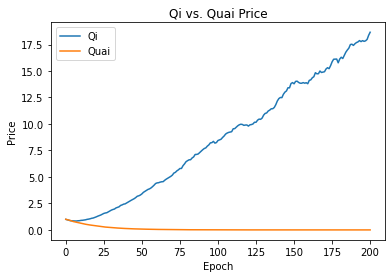

In [4]:
import matplotlib.pyplot as plt
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[], parameter_preperation_functions=[])

qi_price = []
quai_price = []
epochs = list(range(0, 201))
qi_price.append(state["Qi Price"])
quai_price.append(state["Quai Price"])
for bn in epochs[1:]:
    state["Block Number"] = bn
    msi.wiring['Price Movements Wiring'](state, params, [])
    qi_price.append(state["Qi Price"])
    quai_price.append(state["Quai Price"])

plt.plot(epochs, qi_price)
plt.plot(epochs, quai_price)
plt.xlabel("Epoch")
plt.ylabel("Price")
plt.title("Qi vs. Quai Price")
plt.legend(["Qi", "Quai"])
plt.show()